*Creado por:*

*Isabel Maniega*

# 2.2 – Realizar consultas SQL para recuperar y manipular datos.

**SQL** significa *lenguaje de consulta estructurado*, que se utiliza para interactuar con bases de datos relacionales. SQL es un lenguaje de consulta basado en cláusulas que puede permitir la extracción de grandes cantidades de datos en un corto período de tiempo. Es una habilidad importante para los científicos de datos y analistas de datos, que a menudo consultan y extraen datos de las bases de datos.

SQL significa lenguaje de consulta estructurado que se utiliza para consultar, actualizar y administrar bases de datos relacionales (RDBMS) y extraer datos. Es una habilidad esencial para los científicos de datos y analistas, ya que las bases de datos relacionales son muy comunes en las organizaciones debido a su simplicidad y facilidad de mantenimiento.

Una base de datos relacional (RDBMS) es una colección de elementos de datos con relaciones predefinidas con ellos. Organiza los datos en forma de tablas, es decir, en forma de filas y columnas. En RDBMS, el esquema para cada característica está predefinido. Algunas de las bases de datos relacionales más comunes son MySQL, Oracle, etc.

Las bases de datos relacionales se administran e interactúan con el lenguaje SQL. Por lo tanto, para extraer datos de bases de datos relacionales, debe escribir consultas utilizando declaraciones y cláusulas SQL.

**Declaraciones SQL**

Una de las principales ventajas de SQL es su sintaxis simple y su curva de aprendizaje. Para extraer datos de RDBMS, debe escribir declaraciones SQL que incluyan _cláusulas, nombres de tablas, nombres de campos, expresiones lógicas,_ etc. Como se muestra en la siguiente tabla, existe un orden básico para las cláusulas que debe seguir al escribir declaraciones SQL para la extracción de datos.

| Orden | Cláusula | Descripción |
|------|--------|----------------------------------------------------------------------------------------------------------------|
| 1 | SELECT | La declaración SELECT incluye los datos que desea mostrar. Puede incluir una lista de columnas o características calculadas. |
| 2 | FROM | La cláusula FROM indica el nombre de la tabla que desea consultar para la extracción de datos |
| 3 | WHERE | WHERE se utiliza para filtrar datos según una expresión lógica |
| 4 |GROUP BY| La cláusula GROUP BY se utiliza para agregar datos |
| 5 |HAVING | HAVING se utiliza para filtrar datos agregados |
| 6 |ORDER BY| La cláusula ORDER BY se utiliza para ordenar datos en orden ascendente o descendente según una o varias columnas |
| 7 | LIMIT | LIMIT se utiliza para limitar la cantidad de filas en los datos finales |

# Construir y ejecutar consultas SQL

In [1]:
# pip install fugue[sql]

In [2]:
# pip install fugue-jupyter

In [3]:
from fugue_notebook import setup
setup()

<IPython.core.display.Javascript object>

Creación de dos tablas creadas con pandas:

In [4]:
import pandas as pd

df = pd.DataFrame({"col1": ["A","A","A","B","B","B"], "col2": [1,2,3,4,5,6]})
df2 = pd.DataFrame({"col1": ["A", "B"], "col3": [1, 2]})

In [5]:
df

,col1,col2
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6


In [6]:
df2

,col1,col3
0,A,1
1,B,2


## SELECT...FROM ...

La declaración **SELECT** incluye los datos que desea visualizar. Puede incluir una lista de columnas o características calculadas.

La cláusula **FROM** indica el nombre de la tabla que desea consultar para la extracción de datos

```*``` nos sirve para seleccionar todas las columnas de la tabla por tanto:

In [7]:
%%fsql
# Muestra todos los resultados de la tabla df:

SELECT * FROM df
PRINT

,col1:str,col2:long
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6


In [8]:
%%fsql
# Muestra todos los resultados de la tabla df2:

SELECT * FROM df2
PRINT

,col1:str,col3:long
0,A,1
1,B,2


In [9]:
%%fsql
# Muestra los resultados de la tabla df2 de la columna 1:

SELECT df.col1 FROM df
PRINT

,col1:str
0,A
1,A
2,A
3,B
4,B
5,B


## ...WHERE...

**WHERE** se utiliza para filtrar datos según una expresión lógica

In [10]:
%%fsql
# Mostrar solo los valores de la columna 1 donde tenga el valor de A (df.col1 = "A"), para ello usaremos WHERE:

SELECT df.col1 FROM df
WHERE df.col1 = "A"
PRINT

,col1:str
0,A
1,A
2,A


## ...JOINS...

La cláusula **JOINS** se utiliza para consultar y acceder a datos de varias tablas estableciendo relaciones lógicas entre ellas.

In [11]:
customers = pd.DataFrame({"customer_id": [1, 2, 3, 4, 5], 
                          "first_name": ['John', 'Robert', 'David', 'John', 'Betty'],
                          "last_name": ['Doe', 'Luna', 'Robison', 'Reinhardt', 'Doe'],
                          "age": [31, 22, 22, 25, 28],
                          "country": ['USA', 'USA', 'UK', 'UK', 'UAE']})
customers

,customer_id,first_name,last_name,age,country
0,1,John,Doe,31,USA
1,2,Robert,Luna,22,USA
2,3,David,Robison,22,UK
3,4,John,Reinhardt,25,UK
4,5,Betty,Doe,28,UAE


In [12]:
orders = pd.DataFrame({"order_id": [1, 2, 3, 4, 5], 
                       "item": ['Keyboard', 'Mouse', 'Monitor', 'Keyboard', 'Mousepad'],
                       "amount": [200, 500, 300, 800, 150], 
                       'customer_id': [10, 3, 6, 5, 8]})
orders

,order_id,item,amount,customer_id
0,1,Keyboard,200,10
1,2,Mouse,500,3
2,3,Monitor,300,6
3,4,Keyboard,800,5
4,5,Mousepad,150,8


In [13]:
%%fsql

# Busca la relación entre las dos tablas, seleccionamos las columnas a mostrar y vemos los datos que hay en común,
# entre costumer_id (customers) y customer (orders), solo hay 3, 5:

SELECT customers.customer_id, customers.first_name, orders.item
FROM customers
JOIN orders
ON customers.customer_id = orders.customer_id
PRINT

,customer_id:long,first_name:str,item:str
0,3,David,Mouse
1,5,Betty,Keyboard


**INNER JOIN** statement joins two tables based on a common column and selects rows that have matching values in these columns.

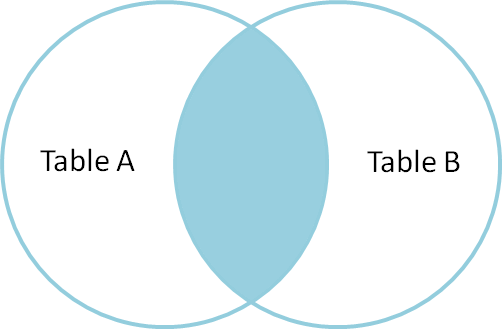

In [14]:
from IPython import display

display.Image("./images/inner_join.png")

# Tabla A: costumers
# Tabla B: orders

In [15]:
# Para este ejemplo modificamos la tabla de orders:

orders = pd.DataFrame({"order_id": [1, 2, 3, 4, 5], 
                       "item": ['Keyboard', 'Mouse', 'Monitor', 'Keyboard', 'Mousepad'],
                       "amount": [200, 500, 300, 800, 150], 
                       'customer_id': [4, 4, 3, 1, 2]})
orders

,order_id,item,amount,customer_id
0,1,Keyboard,200,4
1,2,Mouse,500,4
2,3,Monitor,300,3
3,4,Keyboard,800,1
4,5,Mousepad,150,2


In [16]:
%%fsql

# Busca la relación entre las dos tablas, seleccionamos las columnas a mostrar y vemos los datos que hay en común,
# entre costumer_id (customers) y customer (orders), solo hay 3, 5:

SELECT customers.customer_id, customers.first_name, orders.amount
FROM customers
INNER JOIN orders
ON customers.customer_id = orders.customer_id
PRINT

,customer_id:long,first_name:str,amount:long
0,1,John,800
1,2,Robert,150
2,3,David,300
3,4,John,200
4,4,John,500


El conjunto de resultados constará de:

* columnas customer_id y first_name de la tabla clients
* columna item de la tabla orders

**LEFT JOIN** combina dos tablas en función de una columna común. A continuación, selecciona los registros que tienen valores coincidentes en estas columnas y las filas restantes de la tabla izquierda.

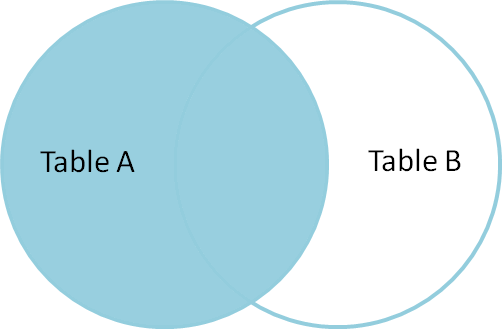

In [17]:
display.Image("./images/Left_Join.png")

In [18]:
%%fsql
# left join Customers and Orders tables based on their shared customer_id columns
# Customers is the left table
# Orders is the right table

SELECT customers.customer_id, customers.first_name, orders.item
FROM customers
LEFT JOIN orders
ON customers.customer_id = orders.customer_id
PRINT

,customer_id:long,first_name:str,item:str
0,1,John,Keyboard
1,2,Robert,Mousepad
2,3,David,Monitor
3,4,John,Keyboard
4,4,John,Mouse
5,5,Betty,NaN


El cliente Betty no aparece en la tabla orders, entonces si aparece al mostrar todos los datos de clientes más los datos que esten en la tabla orders según costumer_id

La instrucción **RIGHT JOIN** une dos tablas en función de una columna común. Selecciona los registros que tienen valores coincidentes en estas columnas y las filas restantes de la tabla derecha.

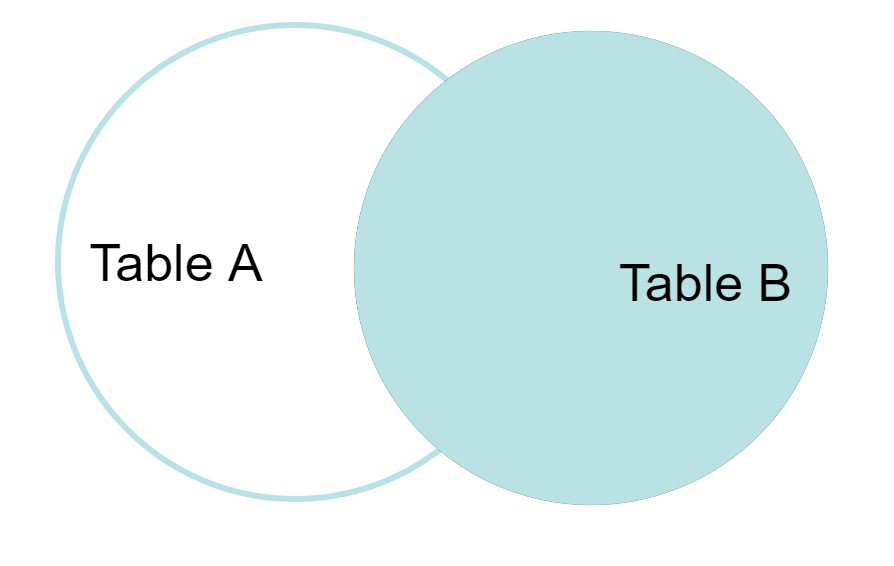

In [19]:
display.Image("./images/rigth_join.jpg")

In [20]:
%%fsql
# join Customers and Orders tables
# based on their shared customer_id columns
# Customers is the left table
# Orders is the right table

SELECT customers.customer_id, customers.first_name, orders.item
FROM customers
RIGHT JOIN orders
ON customers.customer_id = orders.customer_id
PRINT

,customer_id:long,first_name:str,item:str
0,4,John,Keyboard
1,4,John,Mouse
2,3,David,Monitor
3,1,John,Keyboard
4,2,Robert,Mousepad


Muestra todos los datos de la tabla Orders, en relación con los datos de la tabla customers.

Aquí, el código une las tablas de clientes y pedidos en función de customer_id, que es común a ambas tablas. El conjunto de resultados contiene

* las columnas customer_id y first_name de la tabla de clientes
* la columna de artículo de la tabla de pedidos (incluidos aquellos cuyo valor customer_id no está presente en la tabla de clientes)

Y el conjunto de resultados contendrá aquellas filas en las que haya una coincidencia entre customer_id (de la tabla de clientes) y customer (de la tabla de pedidos), junto con todas las filas restantes de la tabla de pedidos.

In [21]:
%%fsql

# Añadimos una condición donde la cantidad sea superior a 500 (WHERE orders.amount >= 500):

SELECT customers.customer_id, customers.first_name, orders.amount
FROM customers
RIGHT JOIN orders
ON customers.customer_id = orders.customer_id
WHERE orders.amount >= 500
PRINT

,customer_id:long,first_name:str,amount:long
1,4,John,500
3,1,John,800


In [22]:
%%fsql

# poner un ALIAS  a las tablas (AS):

# use alias C for customers table
# use alias O for orders table

SELECT C.customer_id, C.first_name, O.amount
FROM customers AS C
RIGHT JOIN orders AS O
ON C.customer_id = O.customer_id
WHERE O.amount >= 500
PRINT

,customer_id:long,first_name:str,amount:long
1,4,John,500
3,1,John,800


La instrucción **FULL OUTER JOIN** une dos tablas en función de una columna común. Selecciona los registros que tienen valores coincidentes en estas columnas y las filas restantes de ambas tablas.

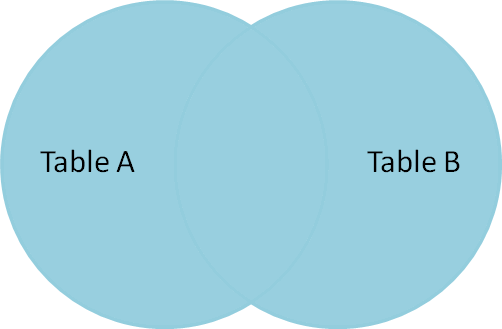

In [23]:
display.Image("./images/Full_Join.png")

In [24]:
%%fsql
# full join Customers and Orders tables
# based on their shared customer_id columns
# Customers is the left table
# Orders is the right table

SELECT customers.customer_id, customers.first_name, orders.item
FROM customers
FULL OUTER JOIN orders
ON customers.customer_id = orders.customer_id
PRINT

,customer_id:long,first_name:str,item:str
0,1,John,Keyboard
1,2,Robert,Mousepad
2,3,David,Monitor
3,4,John,Keyboard
4,4,John,Mouse
5,5,Betty,NaN


Esto significa que el conjunto de resultados contiene todas las filas de ambas tablas, incluidas aquellas que no tienen valores customer_id comunes.

In [25]:
%%fsql
# full join Customers and Orders tables
# based on their shared customer_id columns
# Customers is the left table
# Orders is the right table

SELECT customers.customer_id, customers.first_name, orders.amount
FROM customers
FULL OUTER JOIN orders
ON customers.customer_id = orders.customer_id
PRINT

,customer_id:long,first_name:str,amount:double
0,1,John,800.0
1,2,Robert,150.0
2,3,David,300.0
3,4,John,200.0
4,4,John,500.0
5,5,Betty,NaN


Se observa que falta los valores de Betty para la tabla de orders, ya que no se encuentra su id.

In [26]:
%%fsql
# full join Customers and Orders tables
# based on their shared customer_id columns
# Customers is the left table
# Orders is the right table

SELECT C.customer_id, C.first_name, O.amount
FROM customers AS C
FULL OUTER JOIN orders AS O
ON C.customer_id = O.customer_id
WHERE O.amount >= 500 # Ponemos una condición !!
PRINT

,customer_id:long,first_name:str,amount:double
0,1,John,800.0
4,4,John,500.0


## ...GROUP BY...

Cláusula **GROUP BY** para agrupar filas según el valor de las columnas.

In [27]:
%%fsql

SELECT COUNT(order_id), item
FROM orders
GROUP BY item
PRINT

,_97bc7d06c789:long,item:str
0,2,Keyboard
1,1,Monitor
2,1,Mouse
3,1,Mousepad


In [28]:
%%fsql

# calculate the total amount spent by each customer, customer_id 4: 500 + 200

SELECT customer_id, SUM(amount) AS total
FROM orders
GROUP BY customer_id
PRINT

,customer_id:long,total:long
0,1,800
1,2,150
2,3,300
3,4,700


In [29]:
%%fsql
# count the number of customers in each country

SELECT country, COUNT(*) AS number
FROM customers
GROUP BY country
PRINT

,country:str,number:long
0,UAE,1
1,UK,2
2,USA,2


In [30]:
%%fsql

# join the Customers and Orders tables
# select customer_id and first_name from Customers table
# also select the count of order ids from Orders table
# group the result by customer_id

SELECT customers.customer_id, customers.first_name,
Count(orders.order_id) AS order_count
FROM customers
LEFT JOIN orders
ON customers.customer_id = orders.customer_id
GROUP BY customers.customer_id
PRINT

,customer_id:long,first_name:str,order_count:long
0,1,John,1
1,2,Robert,1
2,3,David,1
3,4,John,2
4,5,Betty,0


## ...HAVING...

Podemos utilizar la cláusula GROUP BY con la cláusula **HAVING** para filtrar el conjunto de resultados en función de las funciones agregadas. Por ejemplo,

In [31]:
%%fsql

# select the customer_id count and country column from Customers
# group by country if the count is greater than 1

SELECT COUNT(customer_id), country
FROM customers
GROUP BY country
HAVING COUNT(customer_id) > 1 
PRINT

,_e6dce8b30e03:long,country:str
1,2,UK
2,2,USA


Aquí, el comando SQL:

* cuenta la cantidad de filas agrupándolas por país
* devuelve el conjunto de resultados si su recuento es mayor que 1.

## ...ORDER BY...

La cláusula **ORDER BY** en SQL se utiliza para ordenar el conjunto de resultados en orden ascendente o descendente.

In [32]:
%%fsql

# orders all rows from Customers in ascending order by country

SELECT *
FROM customers
ORDER BY country
PRINT

,customer_id:long,first_name:str,last_name:str,age:long,country:str
4,5,Betty,Doe,28,UAE
2,3,David,Robison,22,UK
3,4,John,Reinhardt,25,UK
0,1,John,Doe,31,USA
1,2,Robert,Luna,22,USA


**ORDER BY ASC (Ascending Order)**

In [33]:
%%fsql

# orders all rows from Customers in ascending order by age 

SELECT *
FROM customers
ORDER BY age ASC
PRINT

,customer_id:long,first_name:str,last_name:str,age:long,country:str
1,2,Robert,Luna,22,USA
2,3,David,Robison,22,UK
3,4,John,Reinhardt,25,UK
4,5,Betty,Doe,28,UAE
0,1,John,Doe,31,USA


**ORDER BY DESC (Descending Order)**

In [34]:
%%fsql

# orders all rows from Customers in ascending order by age 

SELECT *
FROM customers
ORDER BY age DESC
PRINT

,customer_id:long,first_name:str,last_name:str,age:long,country:str
0,1,John,Doe,31,USA
4,5,Betty,Doe,28,UAE
3,4,John,Reinhardt,25,UK
1,2,Robert,Luna,22,USA
2,3,David,Robison,22,UK


**ORDER BY With Multiple Columns**

In [35]:
%%fsql

# sort all rows from Customers, first by first_name and then by age

SELECT *
FROM customers
ORDER BY first_name, age
PRINT

,customer_id:long,first_name:str,last_name:str,age:long,country:str
4,5,Betty,Doe,28,UAE
2,3,David,Robison,22,UK
3,4,John,Reinhardt,25,UK
0,1,John,Doe,31,USA
1,2,Robert,Luna,22,USA


**ORDER BY With WHERE**

In [36]:
%%fsql

# select last_name and age of customers who don't live in the UK
# and sort them by last_name in descending order

SELECT last_name, age
FROM customers
WHERE NOT country = 'UK'
ORDER BY last_name DESC
PRINT

,last_name:str,age:long
1,Luna,22
0,Doe,31
4,Doe,28


## ...LIMIT...

La palabra clave **LIMIT** nos permite especificar la cantidad de registros en el conjunto de resultados.

In [37]:
%%fsql

SELECT first_name, age
FROM customers
LIMIT 2
PRINT

,first_name:str,age:long
0,John,31
1,Robert,22


# Ejecutar comandos SQL fundamentales para crear, leer, actualizar y eliminar datos en tablas de bases de datos. Establecer conexiones a bases de datos usando Python.

## SQLite

**¿Qué es una base de datos?**

Hoy en día, las aplicaciones sociales como Facebook, Twitter e Instagram son muy populares. Cada día, muchas personas crean nuevas cuentas y los usuarios existentes agregan o comparten diferentes contenidos. Seguramente habrás notado que los datos enviados a esas aplicaciones siguen estando disponibles después de unos días o incluso años. ¿Sabes cómo es posible?

Los datos son simplemente información sobre los usuarios, el contenido de sus publicaciones y comentarios. Los datos son todo tipo de información que podemos enviar a la aplicación. Durante el registro, envías a la aplicación los datos de tu cuenta, que consisten en la dirección de correo electrónico, el nombre de usuario y la contraseña, y cuando agregas nuevas publicaciones envías contenido que será visible para otros usuarios. Los datos enviados deben guardarse en algún lugar al que se pueda acceder fácilmente. Este lugar es una base de datos, que es un conjunto de información almacenada en un disco en un sistema informático. El acceso a la base de datos es posible gracias a un sistema de gestión de bases de datos.

El sistema de gestión de bases de datos (DBMS) es el software responsable de:

- crear una estructura de base de datos;
- insertar, actualizar, eliminar y buscar datos;
- garantizar la seguridad de los datos;
- gestión de transacciones;
- garantizar el acceso simultáneo a los datos para muchos usuarios;
- permitir el intercambio de datos con otros sistemas de bases de datos.

Existen muchos sistemas de gestión de bases de datos gratuitos y pagos en el mercado. Los más populares son:

| Gratuitos | Pagos |
| ------------------------ | ---------------------------------------------- |
| MySQL, PostgreSQL, SQLite| Oracle Database, Microsoft SQL Server, IBM DB2 |

Más adelante en este curso, nos centraremos principalmente en el sistema SQLite. Lo utilizarás para crear tu primera aplicación de base de datos Python. ¿Estás listo? ¡Vamos!

**¿Qué es SQLite y por qué deberías usarlo?**

Antes de crear tu primera base de datos, diremos algunas palabras sobre SQLite, uno de los sistemas de gestión de bases de datos más populares del mundo. SQLite es en realidad una biblioteca C que permite al usuario leer y escribir datos directamente en un archivo. ¿Te sorprende?

La base de datos SQLite completa se almacena en un solo archivo. A diferencia de otros sistemas de gestión de bases de datos, SQLite no requiere que se ejecute un proceso de servidor independiente para comunicarse con la base de datos.

Además, no requiere ninguna configuración, porque es una biblioteca autónoma incluida en un archivo fuente. SQLite también admite transacciones, que son un conjunto de operaciones de base de datos que deben ejecutarse en su totalidad o revertirse si una de ellas falla.

SQLite ha encontrado muchos usos en aplicaciones móviles (tanto en plataformas Android como iOS) para almacenar información sobre su estado. Además, lo utilizan empresas que producen software para automóviles y aviones. El archivo de base de datos es multiplataforma, lo que significa que se puede copiar entre sistemas de 32 y 64 bits.

¿No es sorprendente que puedas transferir la base de datos creada en este curso al software del avión?

**Cómo trabajar con una base de datos SQLite usando Python**

Probablemente ya hayas usado la biblioteca estándar con módulos integrados muchas veces durante tus aventuras con Python. En esta parte del curso, tendrás la oportunidad de aprender sobre un nuevo módulo que te permitirá crear aplicaciones increíbles usando bases de datos SQLite. ¿Puedes adivinar cómo se llama? Si no, no te preocupes, todo quedará claro en un momento.

La biblioteca estándar de Python tiene un módulo llamado ```sqlite3```, que proporciona una interfaz compatible con la especificación DB-API 2.0 descrita por PEP 249. El propósito de la especificación DB-API 2.0 es definir un estándar común para crear módulos para trabajar con bases de datos en Python.

Imagina tres automóviles que tienen el mismo equipo necesario, pero fueron fabricados por otros fabricantes. Lo mismo ocurre con los módulos que implementan la interfaz DB-API 2.0. Cada uno de ellos tiene el mismo método requerido por la especificación, pero pueden ser escritos por distintos programadores, e incluso por usted.

Para utilizar el módulo sqlite3, debe importarlo en su script:
```
import sqlite3
```

NOTA: El módulo sqlite3 está disponible en Python desde la versión 2.5.

**sqlite3 – creación de una base de datos**

Como ya hemos dicho, la base de datos SQLite es un único archivo, que se guarda en tu ordenador. Cada archivo, independientemente del sistema operativo utilizado, tiene su ubicación (una ruta a un espacio de disco específico). Cuando creas una base de datos, puedes crearla en tu directorio de trabajo actual o en cualquier otra ubicación. Para crear una base de datos, utiliza el método ```connect``` que proporciona el módulo ```sqlite3```:
```
import sqlite3

conn = sqlite3.connect('hello.db')
```

El método ```connect``` devuelve la representación de la base de datos como un objeto ```Connection```. En el ejemplo anterior, el método solo toma el nombre de la base de datos como argumento. Esto significa que la base de datos se creará en el mismo directorio que el script que desea acceder a ella. Si desea crear una base de datos en el directorio sqlite3 de su disco C, puede hacerlo de la siguiente manera:
```
import sqlite3

conn = sqlite3.connect('C:\sqlite\hello.db')
```

También es posible utilizar un nombre especial, ```:memory:```, que crea una base de datos en RAM:
```
import sqlite3

conn = sqlite3.connect(':memory:')
```

Recuerda que el método ```connect``` crea una base de datos solo si no puede encontrar una base de datos en la ubicación indicada. Si existe una base de datos, SQLite se conecta a ella.

**Algunas palabras sobre SQL**

Ya has aprendido a crear una base de datos en Python usando el módulo ```sqlite3```. Ahora es el momento de analizar cómo podemos crear su estructura. Para ello, necesitaremos algunos conocimientos de SQL.

SQL es un **lenguaje de consulta estructurado** para crear, modificar y gestionar bases de datos relacionales. Lo utilizan los sistemas de gestión de bases de datos más populares, como MySQL, PostgreSQL y nuestro favorito SQLite. El lenguaje SQL fue desarrollado en los años 70 por IBM. A lo largo de los años, SQL ha sido modificado por muchas empresas que lo han implementado en sus productos. Por lo tanto, se hizo necesario introducir un estándar que estandarizara su sintaxis.

Desde las primeras implementaciones de producción, se han creado los siguientes estándares: SQL-86, SQL-89, SQL-92, SQL:1999, SQL:2003, SQL:2006, SQL:2008, SQL:2011, SQL:2016, SQL:2019. Puede encontrar información detallada sobre cada uno de los estándares en los recursos de Internet. Vale la pena mencionar que SQLite generalmente implementa el estándar SQL-92, con algunas excepciones sobre las que puede leer aquí.

La sintaxis SQL y sus estándares son temas extensos. Afortunadamente, hay muchos materiales gratuitos disponibles en Internet para ayudarlo a adquirir algunos conocimientos básicos. Lo alentamos a familiarizarse con ellos.

Si nunca ha trabajado con SQL antes, no se preocupe. Todos los ejemplos, incluido SQL, se explicarán en detalle.

**sqlite3 – la aplicación TODO**

¿Alguna vez se olvidó de hacer algo durante el día? Si es así, es hora de resolver este problema. Vamos a crear un proyecto simple llamado TODO, durante el cual crearemos una base de datos para almacenar tareas (por hacer) junto con sus prioridades. La estructura de nuestra base de datos constará de una sola tabla llamada tareas:

| taks |
| ------ |
| id |
| name |
| prority|

Para crear la tabla anterior, necesitaremos usar la declaración SQL ```CREATE TABLE```. Su sintaxis es la siguiente:
```
CREATE TABLE table_name (
column1 datatype,
column2 datatype,
column3 datatype,
…
columnN datatype
);
```

La sentencia ```CREATE TABLE``` crea una nueva tabla en la base de datos. En nuestro caso será una tabla llamada ```tasks``` compuesta por tres columnas: ```id```, ```name``` y ```priority```.

La columna ```id``` es una clave primaria que permite identificar de forma única los registros almacenados en la tabla. La segunda columna llamada ```name``` se encarga de almacenar los nombres de las tareas que tendremos que realizar. No es difícil adivinar que serán valores textuales.

Para ello utilizaremos el tipo ```TEXT```. La última columna llamada ```priority``` define la prioridad de nuestras tareas y debe almacenar números enteros.

A continuación se muestra el código SQL que utilizaremos más adelante en el curso para crear nuestra tabla utilizando el módulo sqlite3. Observe las columnas name y priority que contienen la restricción ```NOT NULL```. Esto evitará la creación de tareas con campos iguales a ```NULL```.
```
CREATE TABLE tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);
```

Encontrará más información sobre todos los tipos disponibles en SQLite: https://www.sqlite.org/datatype3.html.

**sqlite3 – creación de tablas**

Al conectarse a la base de datos mediante el método ```connect```, se crea un objeto ```Connection```. Tiene un método muy útil llamado ```cursor```. El método crea un objeto ```Cursor``` que permite ejecutar cualquier instrucción SQL en la base de datos. ¿Cómo se ve en la práctica? Veamos el código responsable de crear la tabla llamada tareas:
```
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('''CREATE TABLE tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);''')
```

Al llamar al método de ejecución, se ejecuta la sentencia ```CREATE TABLE``` en nuestra base de datos. El método de ejecución toma cualquier sentencia SQL individual y los parámetros opcionales necesarios para ejecutar la consulta. La variante con parámetros opcionales se presentará cuando analicemos la inserción de datos en la base de datos.

NOTA: Si se ejecuta el programa anterior dos veces, se generará una excepción con el siguiente mensaje: ```sqlite3.OperationError: la tabla de tareas ya existe```. Esto se debe a que la sentencia está intentando volver a crear una tabla con el mismo nombre. La solución a este problema es modificar la consulta de la siguiente manera:
```
CREATE TABLE IF NOT EXISTS tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);
```

**sqlite3 – inserción de datos (parte 1)**

Felicitaciones. Acaba de crear su primera tabla en la base de datos. Es hora de llenarla con datos. Una vez más, un poco de conocimiento del lenguaje SQL será invaluable, en particular la instrucción INSERT INTO.

La instrucción ```INSERT INTO``` se utiliza para insertar registros en una tabla. Su sintaxis es la siguiente:
```
INSERT INTO table_name (column1, column2, column3, ..., columnN)
VALUES (value1, value2, value3, ..., value4);
```
Usando la fórmula anterior, podemos preparar una consulta que nos permitirá guardar nuestra primera tarea en la base de datos:
```
INSERT INTO tasks (id, name, priority) VALUES (1, 'My first task', 1);
```
or
```
INSERT INTO tasks (name, priority) VALUES ('My first task', 1);
```

Probablemente hayas notado que en la segunda variante se omite la columna ```id```. En este caso, informamos al sistema de gestión de bases de datos de nuestro deseo de utilizar el incremento automático (se nos genera un valor único cuando se inserta un nuevo registro).

Por supuesto, podemos definir nosotros mismos el valor de la columna ```id```, pero es más conveniente no preocuparse por ello.

La instrucción ```INSERT INTO``` también tiene una forma abreviada en la que podemos omitir los nombres de las columnas:
```
INSERT INTO table_name VALUES (value1, value2, value3, ..., valueN);
```

**sqlite3 – inserción de datos (parte 2)**

Veamos cómo utilizar la instrucción ```INSERT INTO``` en nuestro proyecto ```TODO```. Analice el código en el editor.

Los misteriosos caracteres ```?``` utilizados en la instrucción ```INSERT INTO``` son parámetros de consulta que se reemplazan con los valores correctos durante la ejecución de la instrucción. En el ejemplo anterior, el primer carácter ```?``` se reemplazará con Mi primera tarea, mientras que el segundo se reemplazará con ```l```.

Esto es para evitar un ataque de inyección SQL en el que se agrega SQL malicioso a una consulta que podría destruir nuestra base de datos. Puede encontrar más información sobre la inyección SQL y las posibles medidas de protección en Internet.

El método de ejecución, como mencionamos antes, tiene un argumento opcional en forma de una matriz de parámetros. En nuestro caso, toma una tupla, pero puede ser una matriz simple que contenga la misma cantidad de elementos que los parámetros de consulta.

Nuestro código aún no funciona correctamente, pero no te preocupes. En un momento aprenderás un nuevo método que solucionará este problema.

In [38]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);''')
c.execute('INSERT INTO tasks (name, priority) VALUES (?,?)', ('My first task', 1))
conn.close()

**sqlite3 – inserción de datos (parte 3)**

Estamos a un solo paso de insertar nuestra primera tarea en la base de datos. Lo único que nos falta es llamar al método commit proporcionado por el objeto ```Connection```. Observa el código en el editor.

El método commit confirma nuestros cambios (la transacción actual). Si olvidas llamarlo, tus cambios no serán visibles en la base de datos.

En el ejemplo anterior, se utiliza otro método del objeto ```Connection```. El método ```close``` cierra la conexión a la base de datos, por ejemplo, después de insertar todas las tareas.

NOTA: Reiniciar el programa creará otra tarea con el mismo nombre y prioridad, pero con un valor diferente que es autoincremental.

In [39]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);''')
c.execute('INSERT INTO tasks (name, priority) VALUES (?,?)', ('My first task', 1))
conn.commit()
conn.close()

**sqlite3 – el método ```executemany()```**

Realizar muchas consultas no es muy eficiente cuando podemos utilizar solo una que realice la misma tarea. Imagine una situación en la que desea agregar tres tareas a la base de datos. Si utilizamos el método de ejecución, tendríamos que realizar tres consultas independientes.

Esta no es una buena práctica. Afortunadamente, el objeto Cursor nos ofrece un método llamado ```executemany```. Observe el código en el editor.

El método ```executemany``` le permite insertar varios registros a la vez. Como argumento, acepta una sentencia SQL y una matriz que contiene cualquier número de tuplas.

In [40]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);''')
tasks = [
    ('My first task', 1),
    ('My second task', 5),
    ('My third task', 10),
]
c.executemany('INSERT INTO tasks (name, priority) VALUES (?,?)', tasks)
conn.commit()
conn.close()

**Refactorización de aplicaciones**

La refactorización es un proceso muy importante durante el desarrollo de software. El objetivo principal de la refactorización es mejorar la calidad del código. Todo programador en su carrera tendrá que refactorizar su propio código o el de otra persona tarde o temprano.

Un error muy común que cometen los jóvenes adeptos al arte de la programación es repetir los mismos fragmentos de código en diferentes lugares de la aplicación. En este caso, la refactorización consiste en crear una función que contenga fragmentos repetitivos. Como resultado, se reduce el volumen del código y se vuelve más legible.

Probablemente haya notado que agregar nuevas funcionalidades a nuestra aplicación ```TODO``` sería muy difícil. Esto es una señal de que nuestra aplicación requiere refactorización. A continuación, se muestran sugerencias de cambios que podemos realizar:

- crear una clase llamada ```TODO``` que se conectará a la base de datos en el constructor. Si lo desea, puede implementar un método separado llamado ```connect``` para este propósito;
- mover el código responsable de crear la tabla de tareas al método llamado ```create_tasks_table```;
- crear un método llamado ```add_task``` que obtendrá el nombre y la prioridad de la tarea del usuario en lugar de usar valores codificados.

¿Seremos capaces de implementar fácilmente, por ejemplo, la funcionalidad de visualización de datos después de estos cambios? Infórmese sobre esto más adelante en el curso.

In [41]:
import sqlite3

class Todo:
    def __init__(self):
        self.conn = sqlite3.connect('todo.db')
        self.c = self.conn.cursor()
        self.create_task_table()
        
    def create_task_table(self):
        self.c.execute('''CREATE TABLE IF NOT EXISTS tasks (
                     id INTEGER PRIMARY KEY,
                     name TEXT NOT NULL,
                     priority INTEGER NOT NULL
                     );''')
    
    def add_task(self):
        name = input('Enter task name: ')
        priority = int(input('Enter priority: '))
        
        self.c.execute('INSERT INTO tasks (name, priority) VALUES (?,?)', (name, priority))
        self.conn.commit()

app = Todo()
app.add_task()

Enter task name:  Test
Enter priority:  5


**sqlite3 – lectura de datos (parte 1)**

Hasta ahora, no hemos mostrado ninguna información en la pantalla sobre las tareas insertadas. Es hora de cambiar eso. Veamos qué hay en nuestra base de datos. Primero necesitaremos la sentencia SQL adecuada, llamada ```SELECT```.

La sentencia ```SELECT``` permite leer datos de una o más tablas. Su sintaxis es la siguiente:
```
SELECT column FROM table_name;
```
o
```
SELECT column1, column2, column3, …, columnN FROM table_name;
```
o
```
SELECT * FROM table_name;
```

En la primera variante, decidimos leer los valores guardados en una sola columna. Si quisiéramos leer únicamente los nombres de las tareas guardadas en la tabla de tareas, podríamos utilizar la siguiente consulta:
```
SELECT name FROM tasks;
```
La segunda variante permite leer valores de más columnas. Si queremos leer los nombres de las tareas y sus prioridades, podemos utilizar la siguiente consulta:
```
SELECT name, priority FROM tasks;
```
Si no tenemos ningún requisito específico, podemos leer los valores de todas las columnas:
```
SELECT * FROM tasks;
```
La última variante mostrará los valores guardados en las columnas id, name y priority.

**sqlite3 – lectura de datos (parte 2)**

Probablemente no te sorprenda saber que la lectura de datos guardados en la base de datos se realiza con el conocido objeto ```Cursor```. Después de llamar al método de ejecución con la instrucción ```SELECT``` adecuada, el objeto ```Cursor``` se trata como un iterador. Observa el código en el editor.

Resultado:
```
(1, 'My first task', 1)
(2, 'My second task', 5)
(3, 'My third task', 10)
```
La variable fila en cada iteración toma una fila en forma de tupla. El acceso a las columnas individuales se realiza mediante un índice, por ejemplo, print (row [0]) mostrará los valores guardados en la columna id.

In [42]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
for row in c.execute('SELECT * FROM tasks'):
    print(row)
conn.close()

(1, 'My first task', 1)
(2, 'My first task', 1)
(3, 'My second task', 5)
(4, 'My third task', 10)
(5, 'Test', 5)


**sqlite3 – lectura de datos (parte 3)**

Si no desea tratar el objeto ```Cursor``` como un iterador, puede utilizar su método llamado ```fetchall```. El método ```fetchall``` recupera todos los registros (aquellos que aún no se han recuperado del resultado de la consulta). Observe el código en el editor.

Resultado:
```
(1, 'My first task', 1)
(2, 'My second task', 5)
(3, 'My third task', 10)
```
El método ```fetchall``` es menos eficiente que el iterador, porque lee todos los registros en la memoria y luego devuelve una lista de tuplas. Para pequeñas cantidades de datos, no importa, pero si su tabla contiene una gran cantidad de registros, esto puede causar problemas de memoria.

NOTA: El método ```fetchall``` devuelve una lista vacía cuando no hay filas disponibles.

In [43]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('SELECT * FROM tasks')
rows = c.fetchall()
for row in rows:
    print(row)
conn.close()

(1, 'My first task', 1)
(2, 'My first task', 1)
(3, 'My second task', 5)
(4, 'My third task', 10)
(5, 'Test', 5)


**sqlite3 – lectura de datos (parte 4)**

Además del iterador y el método ```fetchall```, el objeto ```Cursor``` proporciona un método muy útil llamado ```fetchone``` para recuperar el siguiente registro disponible. Observa el código en el editor.

Resultado:
```
(1, 'My first task', 1)
(2, 'My second task', 5)
```
NOTA: El método ```fetchone``` devuelve None si no hay datos para leer.

In [44]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('SELECT * FROM tasks')
row = c.fetchone()
print(row)
row = c.fetchone()
print(row)
conn.close()

(1, 'My first task', 1)
(2, 'My first task', 1)


**sqlite3 – actualización de datos**

Cada una de las tareas creadas tiene su propia prioridad, pero ¿qué pasa si decidimos que una de ellas debe realizarse antes que las demás? ¿Cómo podemos aumentar su prioridad? Tenemos que utilizar la sentencia SQL llamada ```UPDATE```.

La sentencia ```UPDATE``` se utiliza para modificar registros existentes en la base de datos. Su sintaxis es la siguiente:
```
UPDATE table_name
SET column1 = value1, column2 = value2, column3 = value3, …, columnN = valueN
WHERE condition;
```
Si queremos establecer la prioridad en 20 para una tarea con ideigual a 1, podemos utilizar la siguiente consulta:
```
UPDATE tasks SET priority = 20 WHERE id = 1;
```
NOTA: Si olvida la cláusula ```WHERE```, se actualizarán todos los datos de la tabla.

Como antes, ejecutamos todas las sentencias SQL utilizando el método de ejecución. Observe el código en el editor.

In [45]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('UPDATE tasks SET priority = ? WHERE id = ?', (20, 1))
conn.commit()
conn.close()

**sqlite3 – eliminación de datos**

Luego de completar una tarea, queremos eliminarla de nuestra base de datos. Para ello, debemos utilizar la sentencia SQL denominada ```DELETE```:
```
DELETE FROM table_name WHERE condition;
```
Veamos cómo se vería eliminar la tarea con ```id = 1```:
```
DELETE FROM tasks WHERE id = 1;
```
NOTA: Si olvida la cláusula ```WHERE```, se eliminarán todos los datos de la tabla.

Observe el código en el editor para ver cómo eliminar un registro utilizando el módulo sqlite3.

In [46]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('DELETE FROM tasks WHERE id = ?', (1,))
conn.commit()
conn.close()

**Excepciones sqlite3**

La jerarquía de excepciones está definida por DB-API 2.0 (PEP 249).

*exception sqlite3.Warning*

Esta excepción no la genera actualmente el módulo sqlite3, pero puede generarla la aplicación que utilice sqlite3, por ejemplo, si una función definida por el usuario trunca datos al insertarlos. Warning es una subclase de Exception.

*exception sqlite3.Error*

La clase base de las otras excepciones de este módulo. Utilícela para capturar todos los errores con una única declaración except. Error es una subclase de Exception.

Si la excepción se originó dentro de la biblioteca SQLite, se agregan los siguientes dos atributos a la excepción:

- sqlite_errorcode: el código de error numérico de la API de SQLite

- sqlite_errorname: el nombre simbólico del código de error numérico de la API de SQLite

*exception sqlite3.InterfaceError*

Excepción generada por el uso incorrecto de la API de C de SQLite de bajo nivel. En otras palabras, si se genera esta excepción, probablemente indique un error en el módulo sqlite3. InterfaceError es una subclase de Error.

*exception sqlite3.DatabaseError*

Excepción generada para errores relacionados con la base de datos. Sirve como excepción base para varios tipos de errores de base de datos. Solo se genera de forma implícita a través de las subclases especializadas. DatabaseError es una subclase de Error.

*exception sqlite3.DataError*

Excepción generada para errores causados ​​por problemas con los datos procesados, como valores numéricos fuera de rango y cadenas demasiado largas. DataError es una subclase de DatabaseError.

*exception sqlite3.OperationalError*

Excepción generada para errores relacionados con el funcionamiento de la base de datos y no necesariamente bajo el control del programador. Por ejemplo, no se encuentra la ruta de la base de datos o no se pudo procesar una transacción. OperationalError es una subclase de DatabaseError.

*exception sqlite3.IntegrityError*

Excepción generada cuando se afecta la integridad relacional de la base de datos, p. ej. Se produce un error en la comprobación de una clave externa. Es una subclase de DatabaseError.

*exception sqlite3.InternalError*

Se genera una excepción cuando SQLite encuentra un error interno. Si se genera, puede indicar que hay un problema con la biblioteca SQLite en tiempo de ejecución. InternalError es una subclase de DatabaseError.

*exception sqlite3.ProgrammingError*

Excepción generada por errores de programación de la API de sqlite3, por ejemplo, proporcionar la cantidad incorrecta de enlaces a una consulta o intentar operar en una conexión cerrada. ProgrammingError es una subclase de DatabaseError.

*exception sqlite3.NotSupportedError*

Excepción generada en caso de que la biblioteca SQLite subyacente no admita un método o una API de base de datos. Por ejemplo, establecer deterministic en True en create_function(), si la biblioteca SQLite subyacente no admite funciones deterministas. NotSupportedError es una subclase de DatabaseError.

In [47]:
# Importamos las librería sqlite3:
import sqlite3

# Creamos un archivo como extensión .db donde se almacenará la información, si no existe se crea:
conexion=sqlite3.connect("database.db")
try:
    # Creamos la tabla anteriormente explicada:
    conexion.execute("""CREATE TABLE articulos (codigo integer primary key autoincrement, 
                        descripcion text, precio real)""")
    print("se creo la tabla articulos")                        
except sqlite3.OperationalError:
    # si ocurre un error al crear la tabla nos mostrará el siguiente error:
    print("La tabla articulos ya existe")                    
conexion.close()

se creo la tabla articulos


*Creado por:*

*Isabel Maniega*